# Advanced Univariate Analysis

### 1. Import Dependencies

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

### 2. Data Loading

In [3]:
df = pd.read_csv('../Data/Processed/Telco_Churn_Class_Imbalance_Analized.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,is_new_customer,TenureSegment,ServiceUsage,BillingLevel,BillingTenureSegment,EngagementScore,EngagementSegment,BillingEngageSegment,TenureEngageSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,New,Heavy,Low,Low-New,2,LowEngage,Low-LowEngage,New-LowEngage
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0,New,Heavy,Low,Low-New,4,MidEngage,Low-MidEngage,New-MidEngage
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0,New,Light,High,High-New,2,LowEngage,High-LowEngage,New-LowEngage


### 3. Univariate Analysis for Numerical Features

#### 3.1 Distribution plots

In [4]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

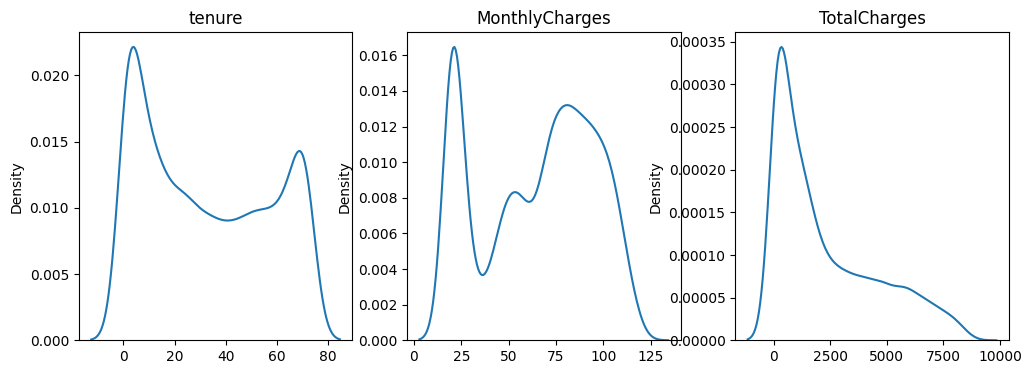

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.kdeplot(
                data=df[col],
                ax=axes[idx]
                )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

#### 3.2 Box  Plots

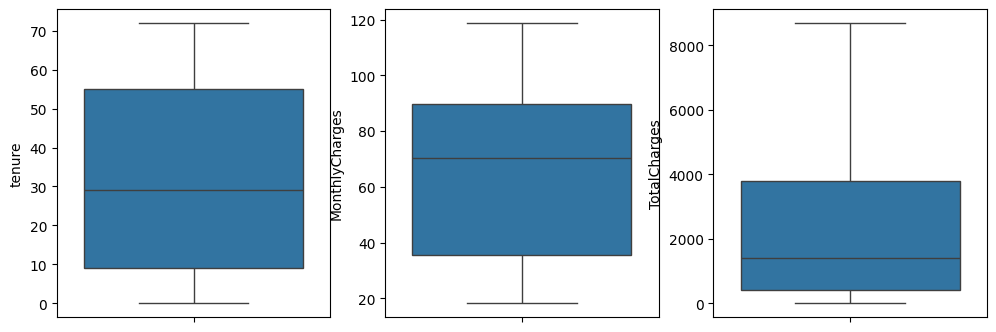

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=df['tenure'], ax=axes[0])
sns.boxplot(data=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(data=df['TotalCharges'], ax=axes[2])

plt.show()

#### 3.3 Outlier Detection using Empirical rule

In [7]:
def find_outlier(data):
    
    mean = data.mean()
    std = data.std()
    
    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)
    
    return (data > upper_bound) | (data < lower_bound)

In [8]:
for col in numerical_cols:
    n_outliers = find_outlier(df[col]).sum()
    n_outlier_percentage = round(n_outliers/len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage})")

tenure : 0 outliers (0.0)
MonthlyCharges : 0 outliers (0.0)
TotalCharges : 0 outliers (0.0)


#### 3.4 Outlier Detection using IQR method

In [9]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    return (data > upper_bound) | (data < lower_bound)

In [10]:
for col in numerical_cols:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers/len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage})")

tenure : 0 outliers (0.0)
MonthlyCharges : 0 outliers (0.0)
TotalCharges : 0 outliers (0.0)


We assessed potential outliers in the three main numerical features:

- `Tenure`
- `MonthlyCharges`
- `TotalCharges`

##### Methods Used:
- **Z-Score Method (3-Sigma Rule):**  
  No data points were found outside ±3 standard deviations for any of the features.
  
- **IQR Method:**  
  Outliers were determined using the 1.5×IQR rule. All features showed 0 outliers.

- **Boxplot Visualization:**  
  Boxplots for each feature further confirmed the absence of extreme values.

##### Summary:
All numerical features appear to be clean and free from statistical outliers. This suggests high data consistency and indicates no need for outlier removal or imputation in the preprocessing phase.


### 4. Univariate Analysis for Categorical Features

In [11]:
categorical_cols = [
                    'gender', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
                    ]



#### 4.1 Frequency Analysis of distribuions

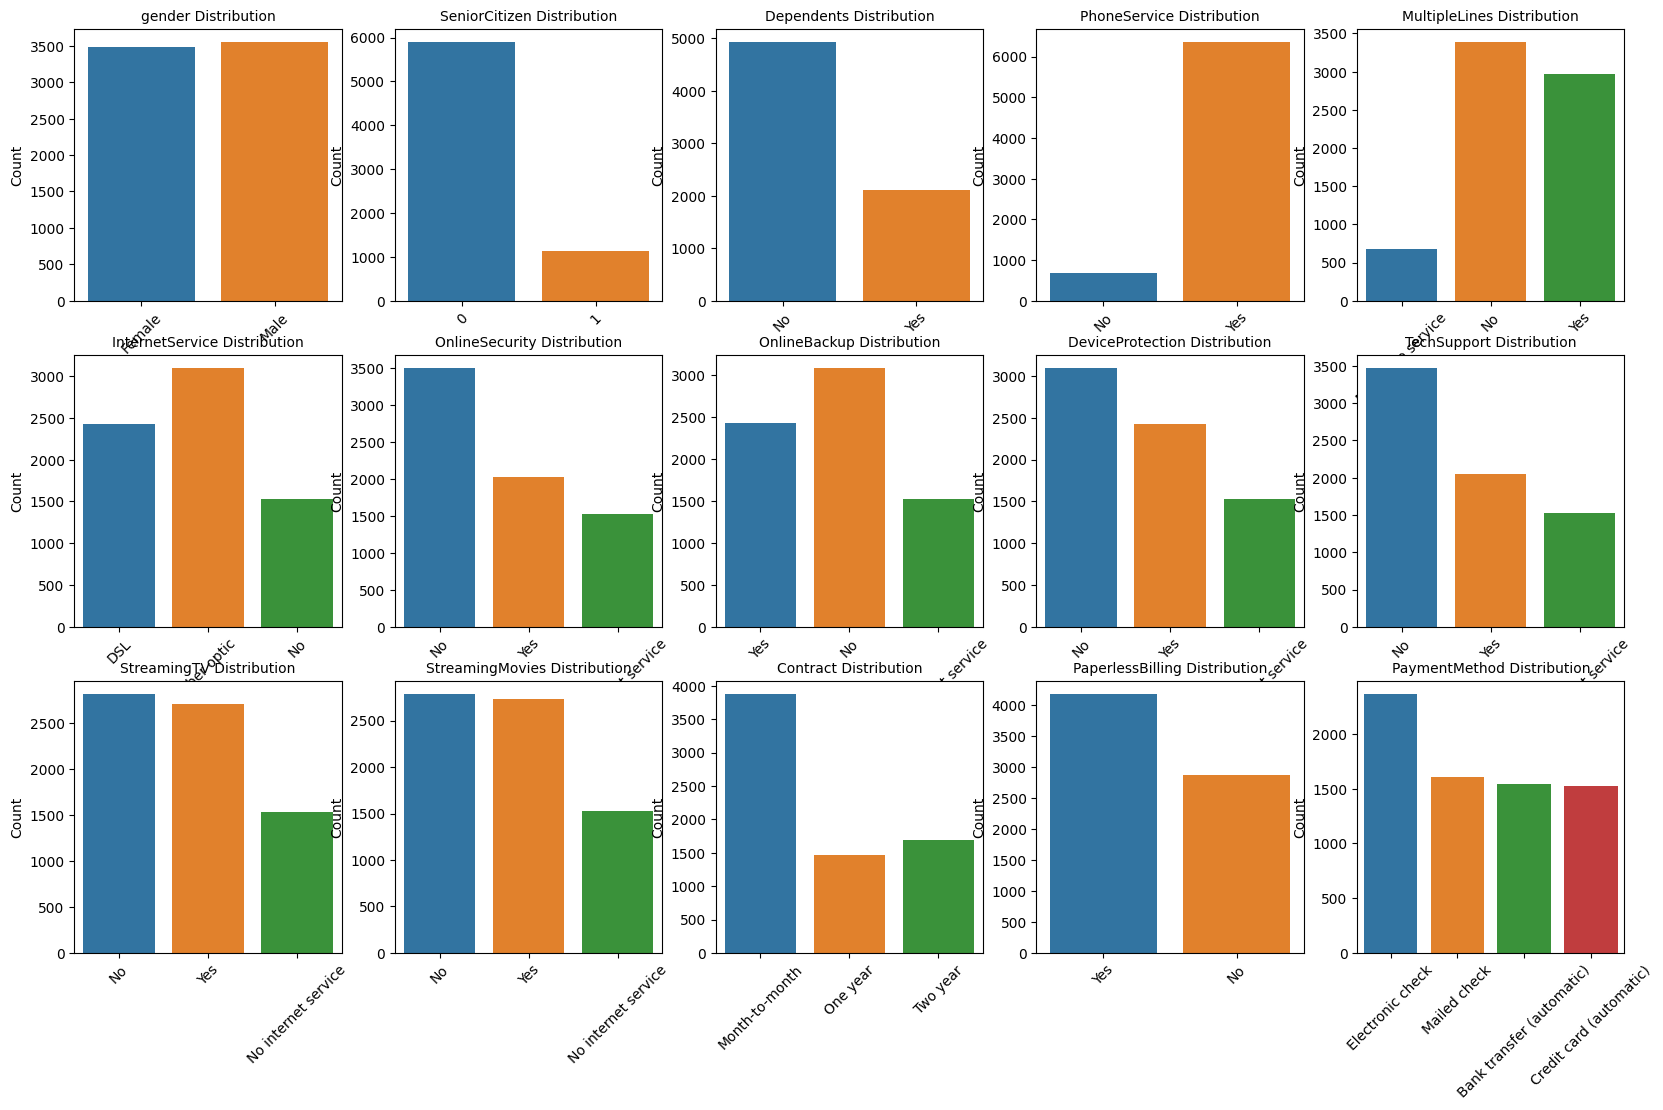

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()


for idx, col in enumerate(categorical_cols):
    
    sns.countplot(data=df, x=col, ax=axes[idx], palette='tab10')
    axes[idx].set_title(f'{col} Distribution', fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.show()

#### 4.2 Analyze Relatioship between Categorical features and Churn

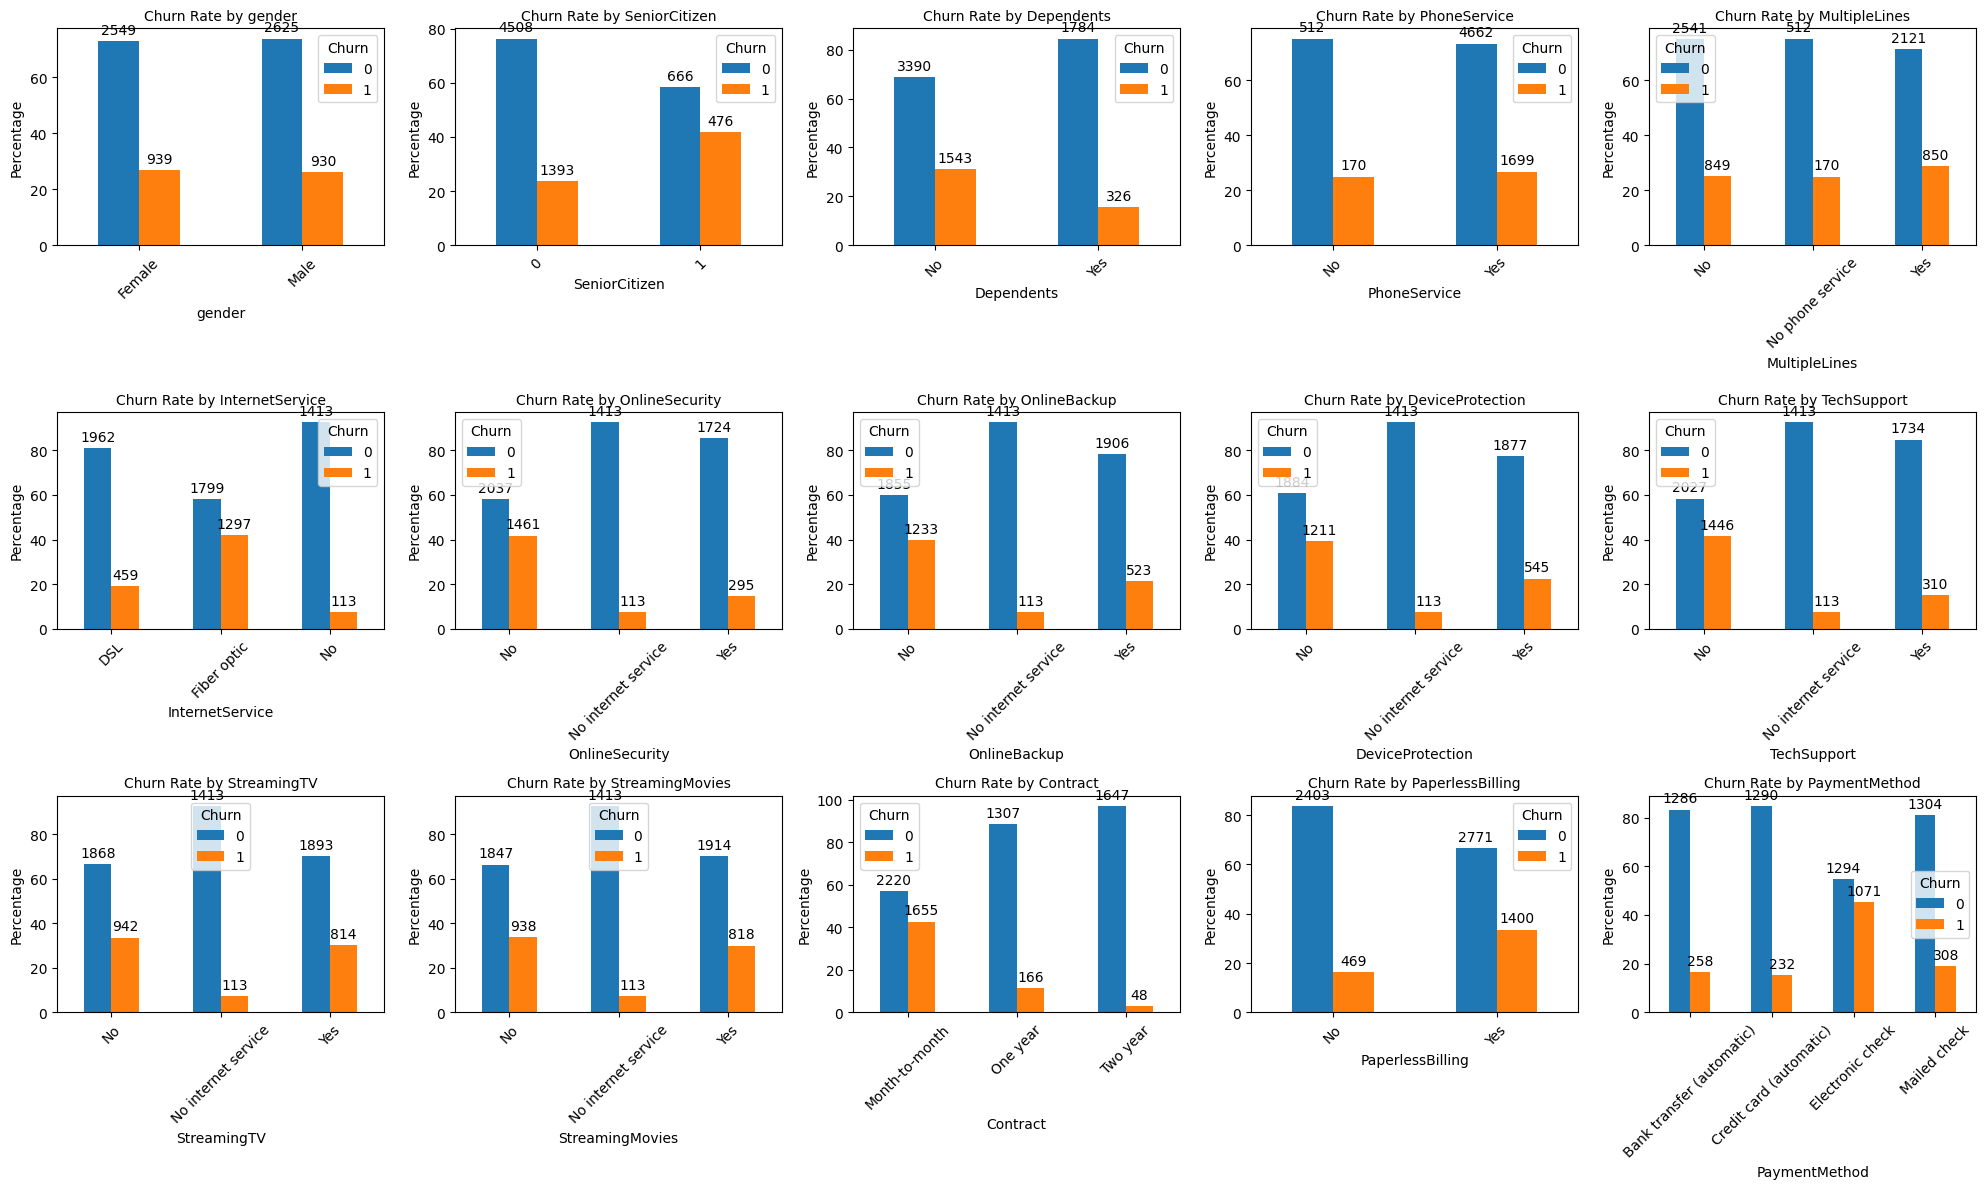

In [13]:
fig, axes =  plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    churn_counts = pd.crosstab(df[col], df['Churn'])    # Absolute churn counts
    churn_rate = pd.crosstab(df[col], df['Churn'], normalize='index') * 100  # Churn rates
    churn_rate.plot(kind='bar', ax=ax)
    
    ax.set_title(f'Churn Rate by {col}', fontsize=10)
    ax.set_ylabel('Percentage')
    ax.bar_label(ax.containers[0], labels=churn_counts[0], fmt='%d', padding=3)
    ax.bar_label(ax.containers[1], labels=churn_counts[1], fmt='%d', padding=3)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Churn')

plt.tight_layout()
plt.show()


#### **Insights**

#### `High Impact Churn Indicators`
1. Contract: This is likely your most powerful predictor. Month-to-month customers have an extremely high churn rate, while customers on One year and Two year contracts are very loyal and rarely churn.

2. InternetService: Customers with Fiber optic have a significantly higher churn rate compared to those with DSL. Customers with No internet service are extremely loyal. This might suggest issues with the fiber service (price, reliability) or that it attracts less loyal customers.

3. TechSupport, OnlineSecurity, OnlineBackup: The pattern is identical and clear across these services. Customers who do not subscribe to these add-ons (No) are far more likely to churn. These services seem to be critical for customer retention.


#### `Customer Demographics Insights`
1. SeniorCitizen: Senior Citizens have a much higher churn rate than younger customers.
2. Dependents: Customers with No dependents are significantly more likely to churn than those who have them. This could mean that customers with families are "stickier."
3. gender: The churn rate between Male and Female customers is almost identical. This feature likely has very little predictive power.


#### `Service and Billing Insights`
1. StreamingTV & StreamingMovies: Interestingly, customers who subscribe to streaming services have a slightly higher churn rate than those who don't. This might be linked to the high churn rate of Fiber optic users, who are more likely to use these services.
2. MultipleLines: The churn difference is small, but customers with MultipleLines have a slightly higher churn rate than those without.
3. PaperlessBilling: Customers who use Paperless Billing are more likely to churn than those who receive paper bills.
4. PaymentMethod: Customers paying by Electronic check churn at a much higher rate than those using any other method (Bank transfer, Credit card, Mailed check).

Your univariate analysis reveals a clear profile of a customer at high risk of churning:

A senior citizen with no dependents, on a month-to-month contract, using Fiber optic internet. They likely pay by electronic check, use paperless billing, and have not subscribed to crucial add-ons like Tech Support or Online Security.

### 5.  Feature Engineering opportunities from the Univariate analysis

Based on patterns observed in the univariate analysis, we propose the following new features to better capture behavioral signals associated with customer churn:

---

#### 1. `IsMonthToMonth`
- **Definition**: A binary flag indicating whether a customer is on a Month-to-month contract.
- **Why?**: Customers on Month-to-month contracts exhibit the highest churn rates. This feature captures that risk explicitly and may improve model sensitivity to short-term contract users.

#### 2. `ProtectionScore Feature`

- Combines 4 protection services (`OnlineBackup`, `OnlineSecurity`, `TechSupport`, `DeviceProtection`).
- Score: counts how many services have `'Yes'` (1 point each), `'No'` or `'No internet service'` = 0.
- Range: 0 (no protection) to 4 (all protections).
- Captures customer engagement with protective add-ons linked to lower churn.

#### 5.1 Implementation

In [14]:
df['IsMonthToMonth'] = (df['Contract'] == 'Month-to-month').astype(int)


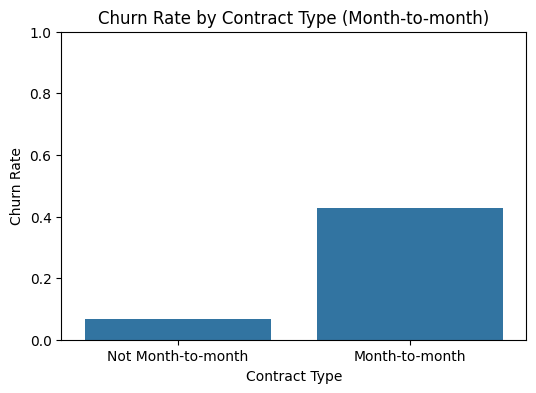

In [15]:
# Churn rate by IsMonthToMonth
month_churn = df.groupby('IsMonthToMonth')['Churn'].mean().reset_index()
month_churn['IsMonthToMonth'] = month_churn['IsMonthToMonth'].map({0: 'Not Month-to-month', 1: 'Month-to-month'})

plt.figure(figsize=(6,4))
sns.barplot(data=month_churn, x='IsMonthToMonth', y='Churn')
plt.title('Churn Rate by Contract Type (Month-to-month)')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.ylim(0,1)
plt.show()


In [16]:
protection_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

df['ProtectionScore'] = df[protection_cols].apply(lambda x: (x == 'Yes').astype(int)).sum(axis=1)

print(df['ProtectionScore'].value_counts())

ProtectionScore
0    2793
1    1467
2    1372
3     941
4     470
Name: count, dtype: int64


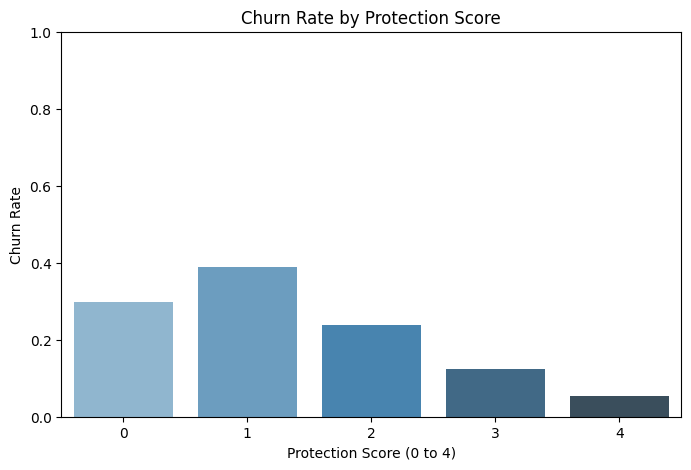

In [17]:
# Churn rate by ProtectionScore
protection_churn = df.groupby('ProtectionScore')['Churn'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=protection_churn, x='ProtectionScore', y='Churn', palette='Blues_d')
plt.title('Churn Rate by Protection Score')
plt.ylabel('Churn Rate')
plt.xlabel('Protection Score (0 to 4)')
plt.ylim(0,1)
plt.show()

#### Insight-Driven Refinement of Protection Features

Our initial `ProtectionScore` feature (ranging from 0 to 4 based on the count of active protection services) revealed a non-linear relationship with churn. Surprisingly, customers with a score of 1 had **higher churn** (~39%) than those with a score of 0 (~30%), indicating that not all protection services equally influence churn.

#### Deeper Analysis:
- **OnlineSecurity** and **TechSupport** were found to correlate with **lower churn** (~30–31%).
- **DeviceProtection** and **OnlineBackup** were associated with **higher churn** (~42–46%).

This analysis highlighted that **low-value protection services** could misleadingly inflate the score, reducing its predictive power. Thus, we needed a refined feature to better capture protection impact.

Based on these insights, we now engineer a binary feature, `HasCoreProtection`, which focuses only on the two strongest predictors: **OnlineSecurity** and **TechSupport**.


In [19]:
# Create the 'HasCoreProtection' feature
# It's 1 if the customer has either OnlineSecurity or TechSupport, and 0 otherwise.
df['HasCoreProtection'] = ((df['OnlineSecurity'] == 'Yes') | (df['TechSupport'] == 'Yes')).astype(int)

# Display the counts of the new feature to verify
print("Distribution of the new 'HasCoreProtection' feature:")
print(df['HasCoreProtection'].value_counts())

Distribution of the new 'HasCoreProtection' feature:
HasCoreProtection
0    4079
1    2964
Name: count, dtype: int64


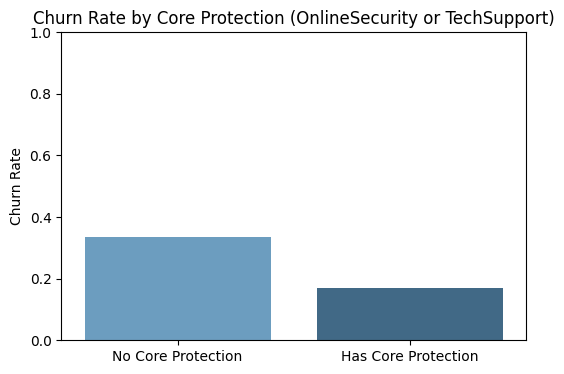

In [20]:
# Churn rate by HasCoreProtection
core_protect_churn = df.groupby('HasCoreProtection')['Churn'].mean().reset_index()

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(data=core_protect_churn, x='HasCoreProtection', y='Churn', palette='Blues_d')
plt.xticks([0, 1], ['No Core Protection', 'Has Core Protection'])
plt.title('Churn Rate by Core Protection (OnlineSecurity or TechSupport)')
plt.ylabel('Churn Rate')
plt.xlabel('')
plt.ylim(0, 1)
plt.show()

#### Feature Refinement: Dropping `ProtectionScore` in Favor of `HasCoreProtection`

Following our detailed analysis of protection-related services and their impact on churn, we engineered a new binary feature: `HasCoreProtection`. This feature captures whether a customer subscribes to **OnlineSecurity** or **TechSupport** — the two services strongly associated with lower churn.

#### Why We Dropped `ProtectionScore`

The previously engineered `ProtectionScore` feature, which simply counted the number of active protection services, was found to be **misleading**:

- **Non-Linear Behavior**: A `ProtectionScore` of 1 corresponded to a surprisingly high churn rate (~39%), due to customers having only low-impact services like OnlineBackup or DeviceProtection.
- **Redundancy**: `ProtectionScore` and `HasCoreProtection` are both derived from the same four service columns. Including both would introduce multicollinearity.
- **Weaker Predictive Power**: Unlike `HasCoreProtection`, which shows a clear and interpretable relationship with churn, `ProtectionScore` introduces noise.
- **Simplicity and Interpretability**: Removing ineffective or noisy features leads to cleaner models and better generalization.

#### Final Decision

We retained `HasCoreProtection` as the final protection-related feature and **dropped `ProtectionScore`** from the dataset. This aligns with the principle of keeping only the most **predictive**, **interpretable**, and **data-driven** features for model training.


In [27]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=['ProtectionScore'])

In [28]:
df_copy.to_csv('../Data/Processed/Telco_Churn_Class_Univariate_Analysis_Done.csv', index=False)